In [ ]:
from sklearn.datasets import load_digits
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib
import warnings
plt.rcParams['axes.labelsize']=14
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
%matplotlib inline
warnings.filterwarnings('ignore')
np.random.seed(42) # 设置全局随机种子

### 生成特征和标签

In [25]:
X=2*np.random.rand(100,1)
y=4+3*X+np.random.randn(100,1) # y=3x+4再加上一个噪音

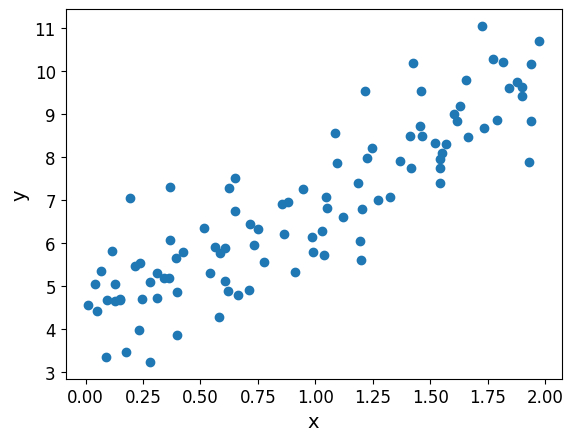

In [26]:
plt.scatter(X,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 用最小二乘法求解参数

$ Θ=(X^T*X)^{-1}*X^T*Y $

In [27]:
X_b=np.c_[np.ones((100,1)),X] # 在前面加上一列1，要加上偏置
theta=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # np.linalg.inv矩阵求逆

In [28]:
theta

array([[4.21509616],
       [2.77011339]])

### 取两个点，带入参数看看效果

In [29]:
X_new=np.array([[0],[2]])
X_new_b=np.c_[np.ones((2,1)),X_new] # 加上一列1
y_pred=X_new_b.dot(theta)
y_pred

array([[4.21509616],
       [9.75532293]])

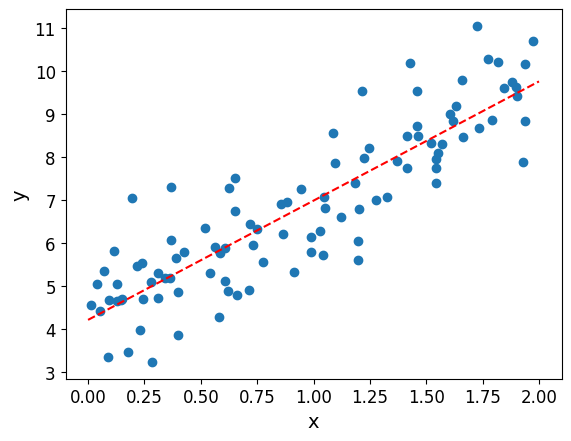

In [30]:
plt.plot(X_new,y_pred,'r--' ) # 红线为当前的预测函数
plt.scatter(X,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [31]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y) # 训练
print(lin_reg.coef_) # 权重参数
print(lin_reg.intercept_) # 偏置参数

[[2.77011339]]
[4.21509616]


### 梯度下降
#### 计算公式： $ \frac{2}{m}X^T*(X*θ-y) $

In [32]:
eta=0.1 #学习率
n_iterations=1000
m=100
theta=np.random.randn(2,1) # 初始参数是随机的
for iteration in range(n_iterations): # 迭代更新参数
    gradients=2/m*X_b.T.dot(X_b.dot(theta)-y) # 根据公式计算梯度
    theta=theta-eta*gradients # 更新参数
theta

array([[4.21509616],
       [2.77011339]])

### 探索学习率的影响

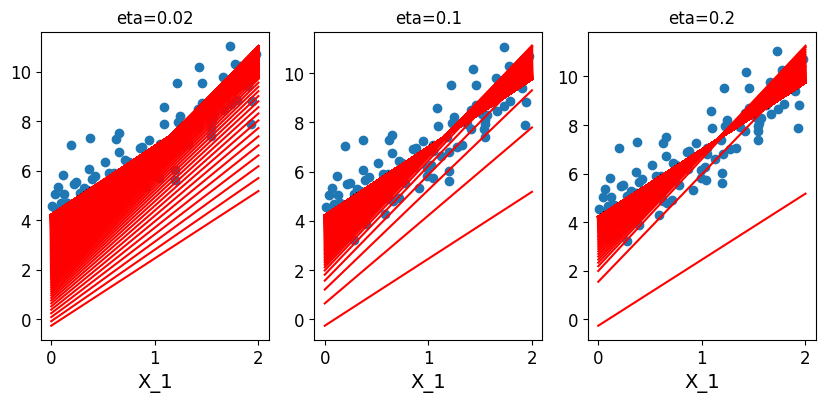

In [33]:
theta_path_bgd=[]
def plot_gradient_descent(theta,eta,theta_path=None): # 传入参数、学习率、参数保存位置
    m=len(X_b)
    plt.scatter(X,y) # 绘制原始数据
    n_iterations=1000
    for iteration in range(n_iterations): # 迭代更新参数
        y_pred=X_new_b.dot(theta)
        plt.plot(X_new,y_pred,'r-') # 绘制预测函数
        gradients=2/m*X_b.T.dot(X_b.dot(theta)-y) # 根据公式计算梯度
        theta=theta-eta*gradients # 更新参数
        if theta_path is not None:
            theta_path.append(theta) # 保存参数
    plt.xlabel('X_1')
    plt.title(f'eta={eta}')
theta=np.random.randn(2,1) # 初始化参数
plt.figure(figsize=(10,4))
plt.subplot(131) # 第一个子图
plot_gradient_descent(theta,eta=0.02)

plt.subplot(132) # 第二个子图
plot_gradient_descent(theta,eta=0.1)
plt.subplot(133) # 第三个子图
plot_gradient_descent(theta,eta=0.2)
plt.show()

### 随机梯度下降：随机取一个样本计算梯度

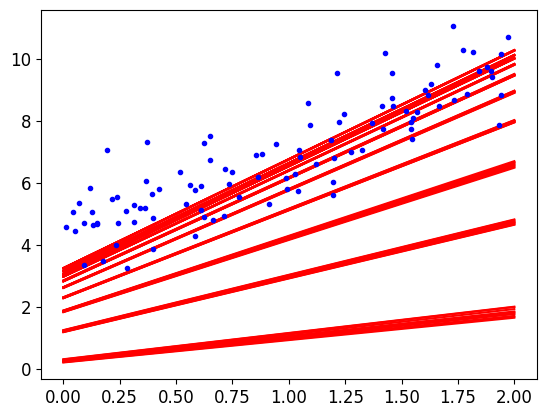

In [34]:
theta_path_sgd=[]
m=len(X_b)
n_epochs=50
# 学习率衰减策略
t0=5
t1=50
def learning_schedule(t):
    return t0/(t1+t) # 轮数增加，分母增大，整体的值减小，越往后值越小，得到衰退的效果
theta=np.random.rand(2,1)
for epoch in range(n_epochs):
    for i in range(m):
        if epoch<10 and i<10:
            y_pred=X_new_b.dot(theta)
            plt.plot(X_new,y_pred,'r-')
        random_index=np.random.randint(m) # 随机取一个样本
        xi=X_b[random_index:random_index+1]
        yi=y[random_index:random_index+1]
        gradients=2*xi.T.dot(xi.dot(theta)-yi) # 根据公式计算梯度（用随机取得的样本计算梯度）
        eta=learning_schedule(n_epochs*m+i) # 当前是第几轮，得到相应的学习率
        # 更新参数
        theta=theta-gradients*eta
        theta_path_sgd.append(theta)
plt.plot(X,y,'b.')
plt.show()

### MINI_BATCH

In [35]:
theta_path_mgd=[]
n_epochs=50
minibatch=16
np.random.seed(42) # 指定随机种子
t=0 # 记录第几个批次
theta=np.random.rand(2,1)
for epoch in range(n_epochs):
    shuffled_indices=np.random.permutation(m) # 打乱数据的顺序
    X_b_shuffled=X_b[shuffled_indices]
    y_shuffled=y[shuffled_indices]
    for i in range(0,m,minibatch):
        t+=1
        # 取小批量数据
        xi=X_b_shuffled[i:i+minibatch]
        yi=y_shuffled[i:i+minibatch]
        gradients=2/minibatch*xi.T.dot(xi.dot(theta)-yi) # 样本数量为minibatch
        eta=learning_schedule(t)
        # 更新参数
        theta=theta-eta*gradients
        theta_path_mgd.append(theta)

In [36]:
theta

array([[4.16137105],
       [2.81540523]])

### 多项式回归

In [37]:
m=500
X=6*np.random.rand(m,1)-3 # 随机生成[-3,3]的数据
y=0.5*X**2+X+np.random.randn(m,1) # y=0.5*x^2+x 


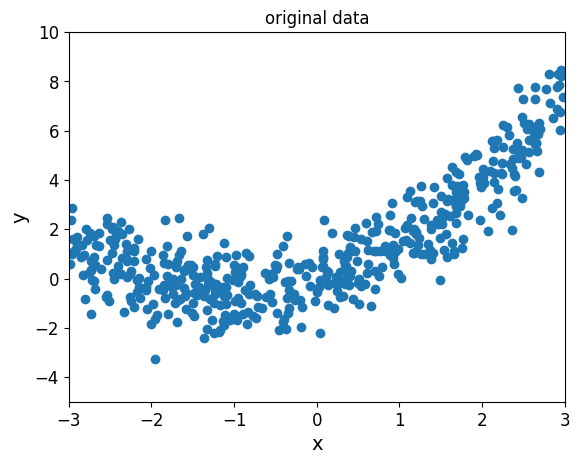

In [38]:
plt.scatter(X,y)
plt.xlabel('x')
plt.ylabel('y')
plt.axis([-3,3,-5,10])
plt.title('original data')
plt.show()

In [39]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2,include_bias=False) # 最高次为2,将原始的输入特征组合成所有二次项和它们之间的乘积特征
X_poly=poly_features.fit_transform(X) # 由于在这里使用的还是线性回归，没有激活函数，为了得到多项式，只能对特征下手，将特征转换为二次，再去线性回归y
X_poly[0]

array([2.38942838, 5.709368  ])

In [40]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y) # 训练
print(lin_reg.coef_) # 权重参数
print(lin_reg.intercept_) # 偏置参数

[[0.97227753 0.49948006]]
[-0.01577598]


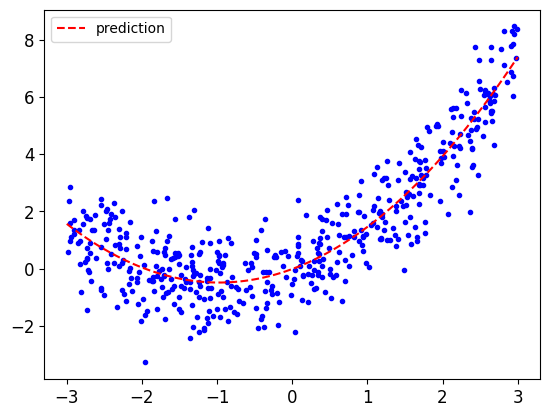

In [41]:
X_new=np.linspace(-3,3,100).reshape(100,1) # 取-3到3之间的100个数据点
X_new_poly=poly_features.transform(X_new) # 前面已经fit过了
y_new=lin_reg.predict(X_new_poly)
plt.plot(X,y,'b.')
plt.plot(X_new,y_new,'r--',label='prediction')
plt.legend(loc='best')
plt.show()

### 对比实验

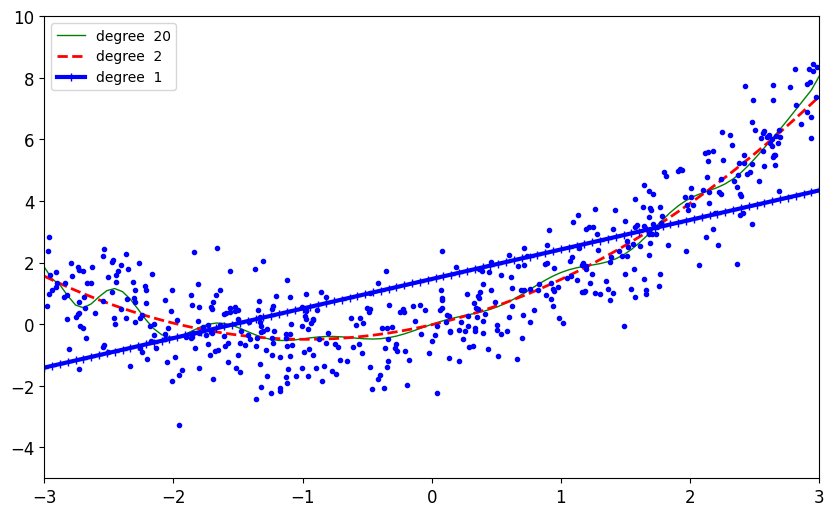

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
plt.figure(figsize=(10,6))
for style,width,degree in (('g-',1,20),('r--',2,2),('b-+',3,1)):
    poly_features=PolynomialFeatures(degree=degree,include_bias=False)  
    std=StandardScaler()
    lin_reg=LinearRegression()
    polynomia_reg=Pipeline( # 构造流水线，按照这个步骤执行
        [
            ('poly_features',poly_features),
            ('std',std),
            ('lin_reg',lin_reg)
        ]
    )
    polynomia_reg.fit(X,y)
    y_new_2=polynomia_reg.predict(X_new)
    plt.plot(X_new,y_new_2,style,label='degree  '+str(degree),linewidth=width)
plt.plot(X,y,'b.')
plt.axis([-3,3,-5,10])
plt.legend()
plt.show()

### 数据样本数量对结果的影响

In [43]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model,X,y):
    X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42)
    train_errors,val_errors=[],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict=model.predict(X_train[:m])
        y_val_predict=model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict[:m]))
        val_errors.append(mean_squared_error(y_val,y_val_predict))
    plt.plot(np.sqrt(train_errors),'r-+',linewidth=2,label='train_error')
    plt.plot(np.sqrt(val_errors),'b-',linewidth=3,label='val_error')
    plt.legend()

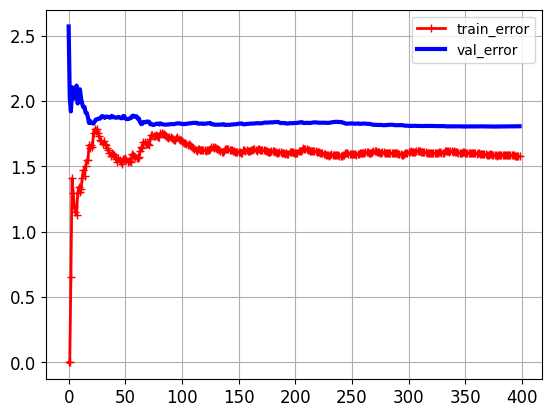

In [44]:
lin_reg=LinearRegression()
plot_learning_curves(lin_reg,X,y)
plt.grid()
plt.show()

### 多项式回归的过拟合风险

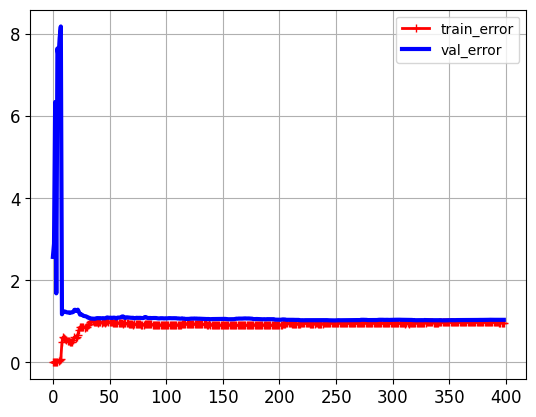

In [50]:
polynomia_reg=Pipeline( # 构造流水线，按照这个步骤执行
    [
        ('poly_features',PolynomialFeatures(degree=4,include_bias=False)), 
        ('lin_reg',LinearRegression())
    ]
)
plot_learning_curves(polynomia_reg,X,y)
plt.grid()
plt.show()

### 正则化

#### 岭回归 

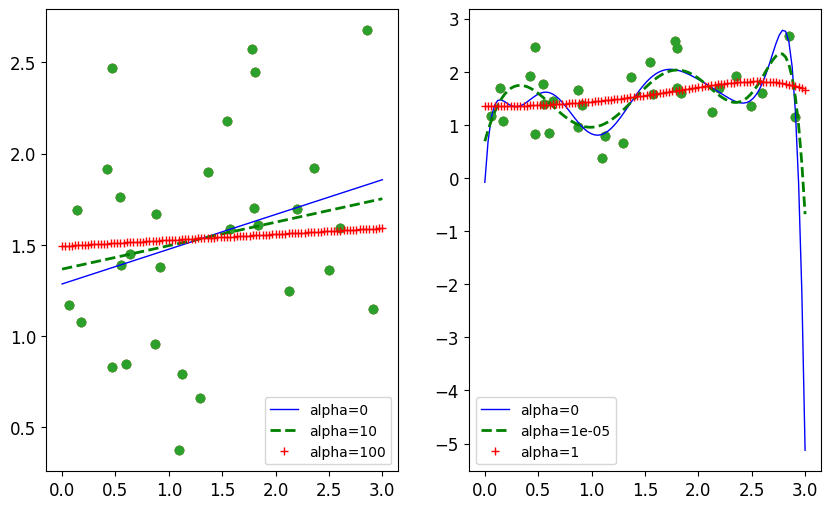

In [ ]:
from sklearn.linear_model import Ridge
np.random.seed(42)
m=30
X=3*np.random.rand(m,1)
y=0.5*X+np.random.randn(m,1)/1.5+1
X_new=np.linspace(0,3,100).reshape(100,1)
def plot_model(model_class,polynomial,alphas,**model_kargs): # 传入模型类、、alpha（对比实验，会有多个alpha）和其他参数
    for (alpha,style) in zip(alphas,('b-','g--','r+')):
        model=model_class(alpha,**model_kargs) # 根据传入的模型类创建模型对象
        if polynomial: # 多项式回归
            model=Pipeline([
                ('poly_features',PolynomialFeatures(degree=10,include_bias=False)),
                ('std',StandardScaler()),
                ('model',model)
            ])
        model.fit(X,y)
        y_new_regu1=model.predict(X_new)
        lw=2 if alpha>0 else 1
        plt.plot(X_new,y_new_regu1,style,linewidth=lw,label=f'alpha={alpha}')
        plt.scatter(X,y)
        plt.legend()
plt.figure(figsize=(10,6))
plt.subplot(121)
plot_model(Ridge,polynomial=False,alphas=(0,10,100))
plt.subplot(122)
plot_model(Ridge,polynomial=True,alphas=(0,10**-5,1))
plt.show()

#### lasso回归

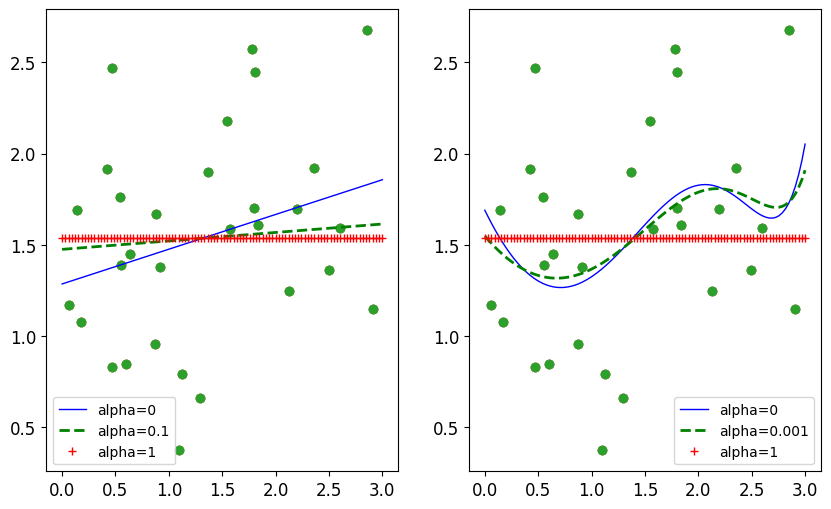

In [68]:
from sklearn.linear_model import Lasso
plt.figure(figsize=(10,6))
plt.subplot(121)
plot_model(Lasso,polynomial=False,alphas=(0,0.1,1))
plt.subplot(122)
plot_model(Lasso,polynomial=True,alphas=(0,10**-3,1))
plt.show()